In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [100]:
def color_thresh(img, rgb_thresh=(160, 160, 160), \
                rock_thresh_min=(60,60,0), rock_thresh_max=(255,255,150)):

    # Create an array of zeros same xy size as img
    # obstacle, rock samples, and navigable terrain are on different channels

    color_select_obstacle = np.zeros_like(img[:,:,0])   
    color_select_rock = np.zeros_like(img[:,:,0])
    color_select_nav = np.zeros_like(img[:,:,0])

    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])       
            
    above_thresh_obs = (img[:,:,0] < rgb_thresh[0]) \
                & (img[:,:,1] < rgb_thresh[1]) \
                & (img[:,:,2] < rgb_thresh[2]) 
            
    above_thresh_rock = (img[:,:,0] > rock_thresh_min[0]) & (img[:,:,0] < rock_thresh_max[0]) \
                    & (img[:,:,1] > rock_thresh_min[1]) & (img[:,:,1] < rock_thresh_max[1]) \
                    & (img[:,:,2] > rock_thresh_min[2]) & (img[:,:,2] < rock_thresh_max[2])\
        

    # Index the array of zeros with the boolean array and set to 1
    color_select_obstacle[above_thresh_obs] = 1
    color_select_rock[above_thresh_rock] = 1
    color_select_nav[above_thresh] = 1
    
    print (above_thresh_rock)
    
    # Return the binary image
    return color_select_obstacle, color_select_rock, color_select_nav

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


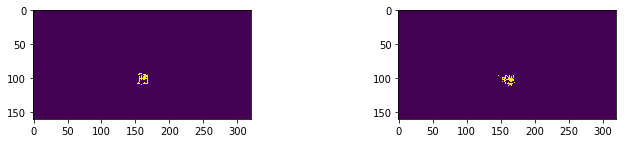

In [144]:
# samplefile = "../calibration_images/color_calibration.jpg"
samplefile = "../calibration_images/example_rock1.jpg"
samplefile2 = "../calibration_images/example_rock2.jpg"
image1 = mpimg.imread(samplefile)
image2 = mpimg.imread(samplefile2)

rock_thresh_min = (50, 45, 0)
rock_thresh_max = (255, 255, 35)
rgb_thresh = (160, 160, 160)

colorsel_obs, colorsel_rock1, \
    colorsel_nav = color_thresh(image1, rgb_thresh, \
                                rock_thresh_min, rock_thresh_max)
    
colorsel_obs, colorsel_rock2, \
    colorsel_nav = color_thresh(image2, rgb_thresh, \
                                rock_thresh_min, rock_thresh_max)
    
fig = plt.figure(figsize=(12,2))
plt.subplot(121)
plt.imshow(colorsel_rock1)
plt.subplot(122)
plt.imshow(colorsel_rock2)

